# COVID-19 Dataset Analysis

**goal: To build an exponential model**

**Importing packages**

In [72]:
from math import *
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

**load the dataset**

In [73]:
covid = pd.DataFrame
covid = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv')

In [74]:
covid 

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...,...
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0


**Groupby date**

In [75]:
covid_groupby_date = covid.copy()
covid_groupby_date = covid_groupby_date.drop('Sno', axis=1)
covid_groupby_date

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...
265,21/03/20,Jammu and Kashmir,4,0,0,0
266,21/03/20,Ladakh,13,0,0,0
267,21/03/20,Uttar Pradesh,23,1,9,0
268,21/03/20,Uttarakhand,3,0,0,0


**Calculate total cases by adding ConfirmedIndianNational,ConfirmedForeignNational,Cured and Deaths**

In [76]:
covid_groupby_date = pd.DataFrame(covid_groupby_date.groupby(['Date'],sort = False).sum())

covid_groupby_date 

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0
04/02/20,3,0,0,0
05/02/20,3,0,0,0
06/02/20,3,0,0,0
07/02/20,3,0,0,0


In [77]:
covid_groupby_date['total cases']=covid_groupby_date.sum(axis=1, numeric_only=True)

covid_groupby_date

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total cases
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3
04/02/20,3,0,0,0,3
05/02/20,3,0,0,0,3
06/02/20,3,0,0,0,3
07/02/20,3,0,0,0,3


**Plot Dates on X-axis and totalcases on Y-axis**

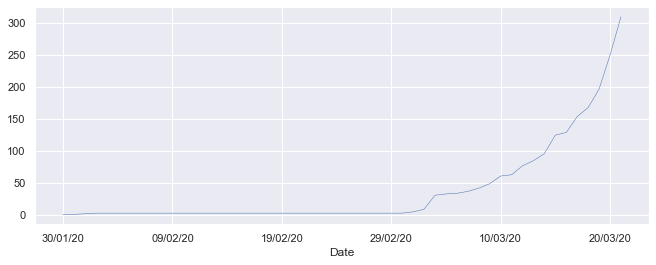

In [78]:
sns.set(rc={'figure.figsize':(11, 4)})
covid_groupby_date['total cases'].plot(linewidth=0.5);

**Using exponential function to model the solution**

1) compute rate of interest

In [79]:
march = covid_groupby_date['04/03/20':'21/03/20']

march

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total cases
Date,,,,,
04/03/20,12,16,3,0,31
05/03/20,14,16,3,0,33
06/03/20,15,16,3,0,34
07/03/20,18,16,3,0,37
08/03/20,23,16,3,0,42
09/03/20,30,16,3,0,49
10/03/20,42,16,3,0,61
11/03/20,44,16,3,0,63
12/03/20,57,17,3,0,77


In [80]:
MarchAnalysis = march.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'], axis = 1)

MarchAnalysis 

,total cases
Date,
04/03/20,31
05/03/20,33
06/03/20,34
07/03/20,37
08/03/20,42
09/03/20,49
10/03/20,61
11/03/20,63
12/03/20,77


In [94]:
#computing using .shift()
rate = ((MarchAnalysis['total cases']- MarchAnalysis['total cases'].shift(1))/ MarchAnalysis['total cases'].shift(1))

rate

Date
04/03/20         NaN
05/03/20    0.064516
06/03/20    0.030303
07/03/20    0.088235
08/03/20    0.135135
09/03/20    0.166667
10/03/20    0.244898
11/03/20    0.032787
12/03/20    0.222222
13/03/20    0.103896
14/03/20    0.129412
15/03/20    0.302083
16/03/20    0.032000
17/03/20    0.193798
18/03/20    0.090909
19/03/20    0.172619
20/03/20    0.269036
21/03/20    0.240000
Name: total cases, dtype: float64

In [95]:
# we can also compute using pct_chnage()
MarchAnalysis['total cases'].pct_change()

Date
04/03/20         NaN
05/03/20    0.064516
06/03/20    0.030303
07/03/20    0.088235
08/03/20    0.135135
09/03/20    0.166667
10/03/20    0.244898
11/03/20    0.032787
12/03/20    0.222222
13/03/20    0.103896
14/03/20    0.129412
15/03/20    0.302083
16/03/20    0.032000
17/03/20    0.193798
18/03/20    0.090909
19/03/20    0.172619
20/03/20    0.269036
21/03/20    0.240000
Name: total cases, dtype: float64

In [96]:
MarchAnalysis['rate of increase'] = pd.DataFrame({'rate of increase': rate})

In [97]:
MarchAnalysis 

,total cases,rate of increase
Date,,
04/03/20,31,NaN
05/03/20,33,0.064516
06/03/20,34,0.030303
07/03/20,37,0.088235
08/03/20,42,0.135135
09/03/20,49,0.166667
10/03/20,61,0.244898
11/03/20,63,0.032787
12/03/20,77,0.222222


**Building predicted forcast formula using our computed rate of interest**

$$p_t = (p_o * (e(pow(r*t)))$$

calculate average rate

In [108]:
R = MarchAnalysis['rate of increase'].mean()

R

0.14814803793984233

In [106]:
p_o = 31
t = 26
p_t = (p_o*(np.exp((R*t))))

In [107]:
p_t

1459.4810275382426

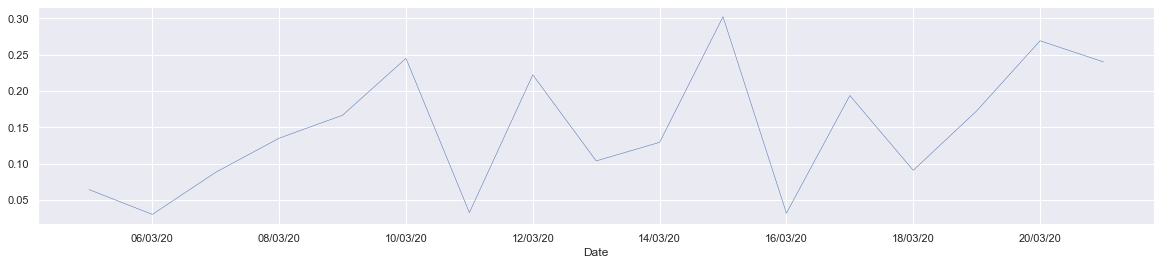

In [114]:
sns.set(rc={'figure.figsize':(20, 4)})
MarchAnalysis['rate of increase'].plot(linewidth=0.5);

our forecasted valu turned out to be : **1459.4810275382426**